In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Specifica il path del file CSV
#file_path = r"C:\Users\kj8annelmi\Desktop\Prog\env\finmang_data.csv"
file_path = r"C:\Users\annal\OneDrive\Desktop\PythonLab\ProgGitHub\Prog1\finmang_data.csv"
# Carica il CSV in un DataFrame
df = pd.read_csv(file_path)
# Prima visualizzazione
df.head()

,Transaction ID,Date,Account Type,Transaction Amount,Cash Flow,Net Income,Revenue,Expenditure,Profit Margin,Debt-to-Equity Ratio,Operating Expenses,Gross Profit,Transaction Volume,Processing Time (seconds),Accuracy Score,Missing Data Indicator,Normalized Transaction Amount,Transaction Outcome
0,1,2025-01-01,Asset,1176,3184,2174,3137,1823,0.607221,2.067004,4098,2327,8,1.894686,0.959936,False,0.218724,1
1,2,2025-01-02,Asset,1291,3221,3236,4694,2746,0.355608,2.347537,3872,388,5,1.728990,0.966382,False,0.242232,1
2,3,2025-01-03,Revenue,4966,3309,3689,3363,3102,0.678347,1.901003,4780,2616,2,1.707099,0.828307,False,0.993459,1
3,4,2025-01-04,Expense,4641,1952,245,4373,808,0.221047,0.934125,4948,2237,8,1.750641,0.984149,False,0.927024,1
4,5,2025-01-05,Expense,2305,2131,2037,4956,644,0.509323,1.061178,3289,1729,3,0.879708,0.929107,False,0.449509,1


In [ ]:
## EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction ID                 1000 non-null   int64  
 1   Date                           1000 non-null   object 
 2   Account Type                   1000 non-null   object 
 3   Transaction Amount             1000 non-null   int64  
 4   Cash Flow                      1000 non-null   int64  
 5   Net Income                     1000 non-null   int64  
 6   Revenue                        1000 non-null   int64  
 7   Expenditure                    1000 non-null   int64  
 8   Profit Margin                  1000 non-null   float64
 9   Debt-to-Equity Ratio           1000 non-null   float64
 10  Operating Expenses             1000 non-null   int64  
 11  Gross Profit                   1000 non-null   int64  
 12  Transaction Volume             1000 non-null   in

In [ ]:
# Media e quantili
df.describe()

,Transaction ID,Transaction Amount,Cash Flow,Net Income,Revenue,Expenditure,Profit Margin,Debt-to-Equity Ratio,Operating Expenses,Gross Profit,Transaction Volume,Processing Time (seconds),Accuracy Score,Normalized Transaction Amount,Transaction Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2535.701000,2426.331000,2114.759000,2610.989000,2026.188000,0.499085,1.781955,2517.95100,2039.058000,4.987000,1.235095,0.898512,0.496668,0.951000
std,288.819436,1432.052409,1169.845927,1100.614577,1358.787787,1129.047997,0.171064,0.720989,1418.44947,1128.130368,2.589118,0.437929,0.056868,0.292734,0.215976
min,1.000000,106.000000,502.000000,203.000000,303.000000,100.000000,0.201363,0.500605,103.00000,101.000000,1.000000,0.500066,0.800554,0.000000,0.000000
25%,250.750000,1363.500000,1360.750000,1168.750000,1426.000000,1004.750000,0.354579,1.157240,1290.00000,1067.000000,3.000000,0.864168,0.848545,0.257052,1.000000
50%,500.500000,2498.000000,2452.000000,2075.500000,2570.500000,2048.000000,0.492161,1.818015,2549.00000,2039.000000,5.000000,1.213391,0.897044,0.488962,1.000000
75%,750.250000,3774.000000,3414.000000,3078.500000,3776.500000,3009.500000,0.642220,2.375929,3735.50000,3007.500000,7.000000,1.623384,0.947914,0.749796,1.000000
max,1000.000000,4998.000000,4496.000000,3995.000000,4997.000000,3998.000000,0.798427,2.999644,4999.00000,3995.000000,9.000000,1.999773,0.999934,1.000000,1.000000


                               Transaction Amount  Cash Flow  Net Income  \
Transaction Amount                       1.000000   0.000832    0.026041   
Cash Flow                                0.000832   1.000000   -0.016927   
Net Income                               0.026041  -0.016927    1.000000   
Revenue                                  0.068778  -0.003429   -0.062107   
Expenditure                             -0.005263   0.054190    0.018591   
Profit Margin                           -0.037542  -0.004282   -0.015106   
Debt-to-Equity Ratio                    -0.001509  -0.000810   -0.012475   
Operating Expenses                       0.026186  -0.111590    0.034200   
Gross Profit                            -0.035526  -0.011541   -0.004542   
Transaction Volume                       0.005073   0.037704   -0.006197   
Accuracy Score                           0.073578  -0.036588   -0.034426   
Normalized Transaction Amount            1.000000   0.000832    0.026041   

           

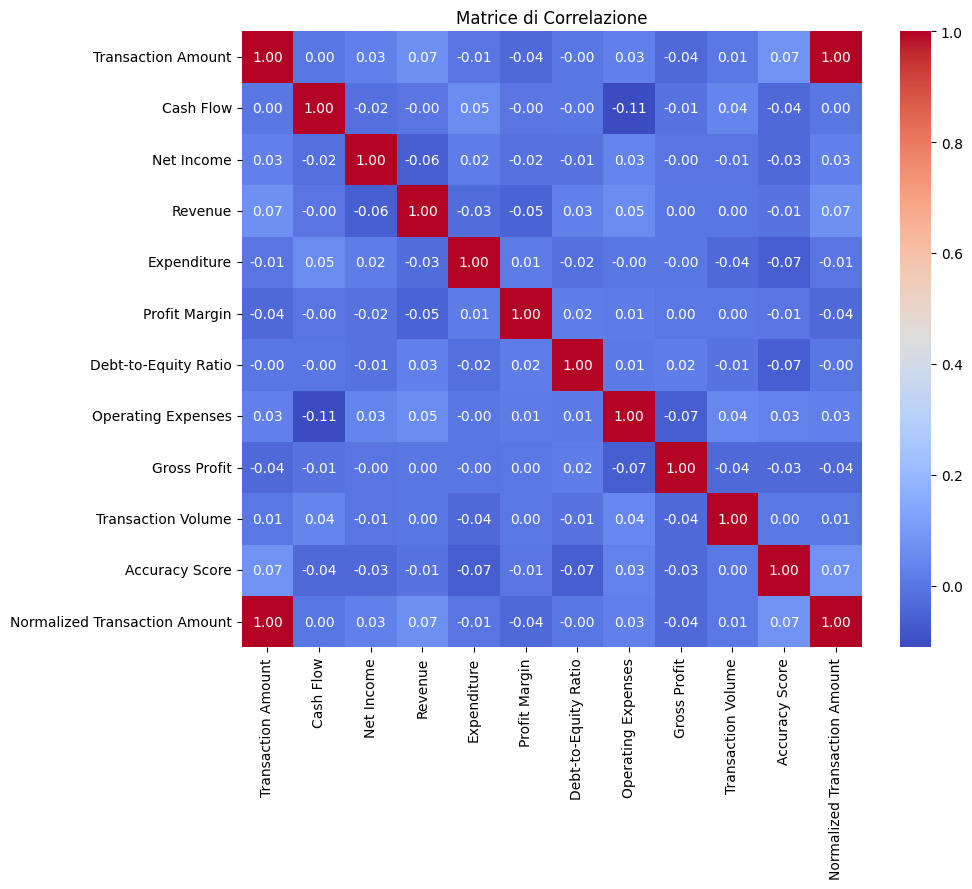

,Cash Flow,Normalized Transaction Amount
Cash Flow,1.000000,0.000832
Normalized Transaction Amount,0.000832,1.000000


In [24]:
# verifico la correlazione tra le variabili
subset = df[['Transaction Amount','Cash Flow','Net Income','Revenue','Expenditure','Profit Margin','Debt-to-Equity Ratio','Operating Expenses','Gross Profit','Transaction Volume','Accuracy Score','Normalized Transaction Amount']]
correlation_matrix = subset.corr()
print(correlation_matrix)
# Crea il grafico heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

df[['Cash Flow', 'Normalized Transaction Amount']].corr()

Non sembra esserci correlazione tra le variabili del dataset.

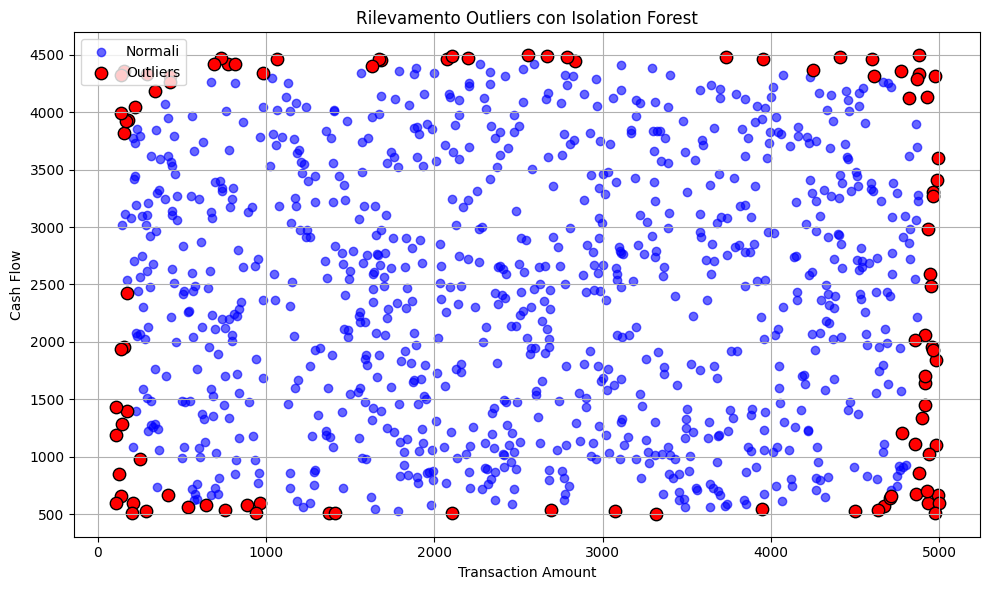

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1, random_state=42)
df_numeric = df[['Transaction Amount', 'Cash Flow']].dropna()
predictions = iso.fit_predict(df_numeric)
outliers_mask = predictions == -1
outliers = df_numeric[outliers_mask]

# Plot usando outliers_mask
import matplotlib.pyplot as plt

# Seleziona i dati normali e gli outliers
normal_data = df_numeric[~outliers_mask]
outlier_data = df_numeric[outliers_mask]

# Crea il grafico scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['Transaction Amount'], normal_data['Cash Flow'], 
            c='blue', label='Normali', alpha=0.6)
plt.scatter(outlier_data['Transaction Amount'], outlier_data['Cash Flow'], 
            c='red', label='Outliers', edgecolors='black', s=80)

# Etichette e legenda
plt.xlabel('Transaction Amount')
plt.ylabel('Cash Flow')
plt.title('Rilevamento Outliers con Isolation Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

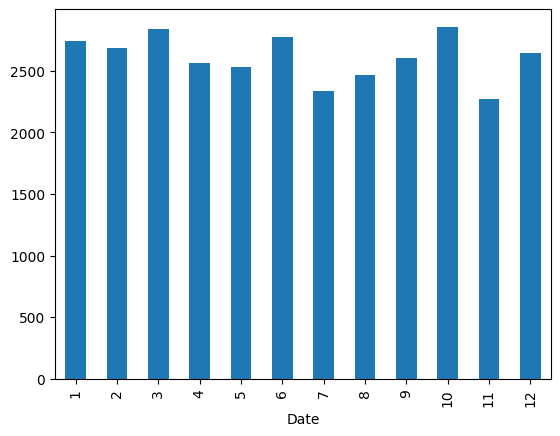

In [13]:
#Verifica presenza stagionalità
df = df.reset_index().rename(columns=lambda c: c.strip())
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.groupby(df.index.month)["Revenue"].mean().plot(kind="bar")
